# Imports

In [16]:
import pandas as pd
#import pandas_datareader.data as web  # one can eventually use datareader but didn't work for me
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


In [17]:
google = yf.Ticker('GOOGL').history('5y')
apple = yf.Ticker('AAPL').history('5y')
amazon = yf.Ticker('AMZN').history('5y')
tesla = yf.Ticker('TSLA').history('5y')

In [18]:
stocks = pd.concat([google['Close'], apple['Close'], amazon['Close'], tesla['Close']], axis=1)
stocks.columns = ['GOOGL', 'AAPL', 'AMZN', 'TSLA']

In [19]:
stocks

,GOOGL,AAPL,AMZN,TSLA
Date,,,,
2019-04-23 00:00:00-04:00,63.529499,49.935188,96.188499,17.593332
2019-04-24 00:00:00-04:00,63.002499,49.858173,95.087502,17.243999
2019-04-25 00:00:00-04:00,63.367001,49.405708,95.112503,16.508667
2019-04-26 00:00:00-04:00,63.870998,49.169842,97.531502,15.676000
2019-04-29 00:00:00-04:00,64.809998,49.244461,96.921501,16.098000
...,...,...,...,...
2024-04-16 00:00:00-04:00,154.399994,169.380005,183.320007,157.110001
2024-04-17 00:00:00-04:00,155.470001,168.000000,181.279999,155.449997
2024-04-18 00:00:00-04:00,156.009995,167.039993,179.220001,149.929993


In [20]:
stocks_rets = (stocks/stocks.shift(1)) # avoid the -1 since we'll log them 
stocks_rets

,GOOGL,AAPL,AMZN,TSLA
Date,,,,
2019-04-23 00:00:00-04:00,NaN,NaN,NaN,NaN
2019-04-24 00:00:00-04:00,0.991705,0.998458,0.988554,0.980144
2019-04-25 00:00:00-04:00,1.005786,0.990925,1.000263,0.957357
2019-04-26 00:00:00-04:00,1.007954,0.995226,1.025433,0.949562
2019-04-29 00:00:00-04:00,1.014701,1.001518,0.993746,1.026920
...,...,...,...,...
2024-04-16 00:00:00-04:00,0.997030,0.980833,0.998366,0.972938
2024-04-17 00:00:00-04:00,1.006930,0.991853,0.988872,0.989434
2024-04-18 00:00:00-04:00,1.003473,0.994286,0.988636,0.964490


In [21]:
# log of returns
log_rets= np.log(stocks_rets)
log_rets

,GOOGL,AAPL,AMZN,TSLA
Date,,,,
2019-04-23 00:00:00-04:00,NaN,NaN,NaN,NaN
2019-04-24 00:00:00-04:00,-0.008330,-0.001543,-0.011512,-0.020056
2019-04-25 00:00:00-04:00,0.005769,-0.009116,0.000263,-0.043579
2019-04-26 00:00:00-04:00,0.007922,-0.004786,0.025115,-0.051755
2019-04-29 00:00:00-04:00,0.014594,0.001516,-0.006274,0.026564
...,...,...,...,...
2024-04-16 00:00:00-04:00,-0.002975,-0.019353,-0.001635,-0.027435
2024-04-17 00:00:00-04:00,0.006906,-0.008181,-0.011191,-0.010622
2024-04-18 00:00:00-04:00,0.003467,-0.005731,-0.011429,-0.036156


In [22]:
# start the simulation

simulations=100000 # number of generated potfolios 
weights = np.zeros((simulations, 4)) # matrix of used weights 
mean_rets = log_rets.mean() # avg (daily) return for each stock
cov_rets = log_rets.cov() # covariance matrix of stocks 
exp_return = np.zeros((simulations)) 
exp_std = np.zeros((simulations))
sharpe = np.zeros((simulations))

for i in range(simulations):
    #generate random weights
    w = np.array(np.random.random(4))
    w /= np.sum(w) # normalize
    weights[i,:] = w # save the weights
    
    # expected log return of current portfolio
    exp_return[i] = np.sum(mean_rets*w)
    
    # expected std or volatility of current portfolio
    exp_std[i] = np.sqrt(np.dot(w.T, np.dot(cov_rets, w)))

    sharpe[i] = exp_return[i]/exp_std[i] 




In [23]:
weights[np.argmax(sharpe)] # optimal weights to be assigned for each stock

array([0.0798989 , 0.69643239, 0.00464706, 0.21902165])

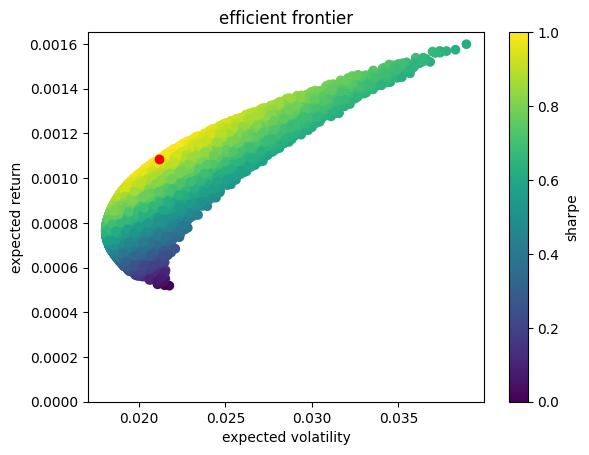

In [24]:
plt.scatter(exp_std, exp_return, c=sharpe)
plt.scatter(exp_std[np.argmax(sharpe)], exp_return[np.argmax(sharpe)], color='red')
plt.xlabel('expected volatility')
plt.colorbar(label='sharpe')
plt.ylabel('expected return')
plt.ylim(0)
plt.title('efficient frontier')
plt.show()